In [1]:
#use case: to classify people prone to heart attack based on 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch' using decision tree algorithm and verify the accuracy with precision, accuracy, recall and f1-score.
       'exang', 'oldpeak', 'slope', 'thal', 'num'
import pandas as pd
df=pd.read_csv(r"/content/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [2]:
df.shape            # EDA process 1

(908, 13)

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [6]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())        #dealing with empty values in the column
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df.oldpeak

,oldpeak
0,2.300000
1,0.000000
2,0.400000
3,0.000000
4,1.500000
...,...
903,1.500000
904,3.000000
905,2.500000
906,0.891253


In [9]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,3
oldpeak,54


In [10]:
from sklearn.preprocessing import LabelEncoder              # cpnverting categorical to numerical to using label encoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['cp']=le.fit_transform(df['cp'])
df['fbs']=le.fit_transform(df['fbs'])
df['restecg']=le.fit_transform(df['restecg'])
df['exang']=le.fit_transform(df['exang'])
df['slope']=le.fit_transform(df['slope'])
df['thal']=le.fit_transform(df['thal'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,0,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,0,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,2,4


In [11]:
df.corr()            # correlation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.232718,-0.054644,0.086049,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.101209,-0.045065,0.054765,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.170467,0.092177,-0.038169,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.152162,0.006748,0.098107,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.028744,0.047292,0.001663,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.022756,-0.026636,-0.030723,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.031561,-0.084796,-0.096546,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.128728,0.224048,-0.043410,-0.323058
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.318034,-0.149261,0.077855,0.327403
oldpeak,0.232718,0.101209,-0.170467,0.152162,0.028744,0.022756,-0.031561,-0.128728,0.318034,1.000000,-0.184895,0.030760,0.416580


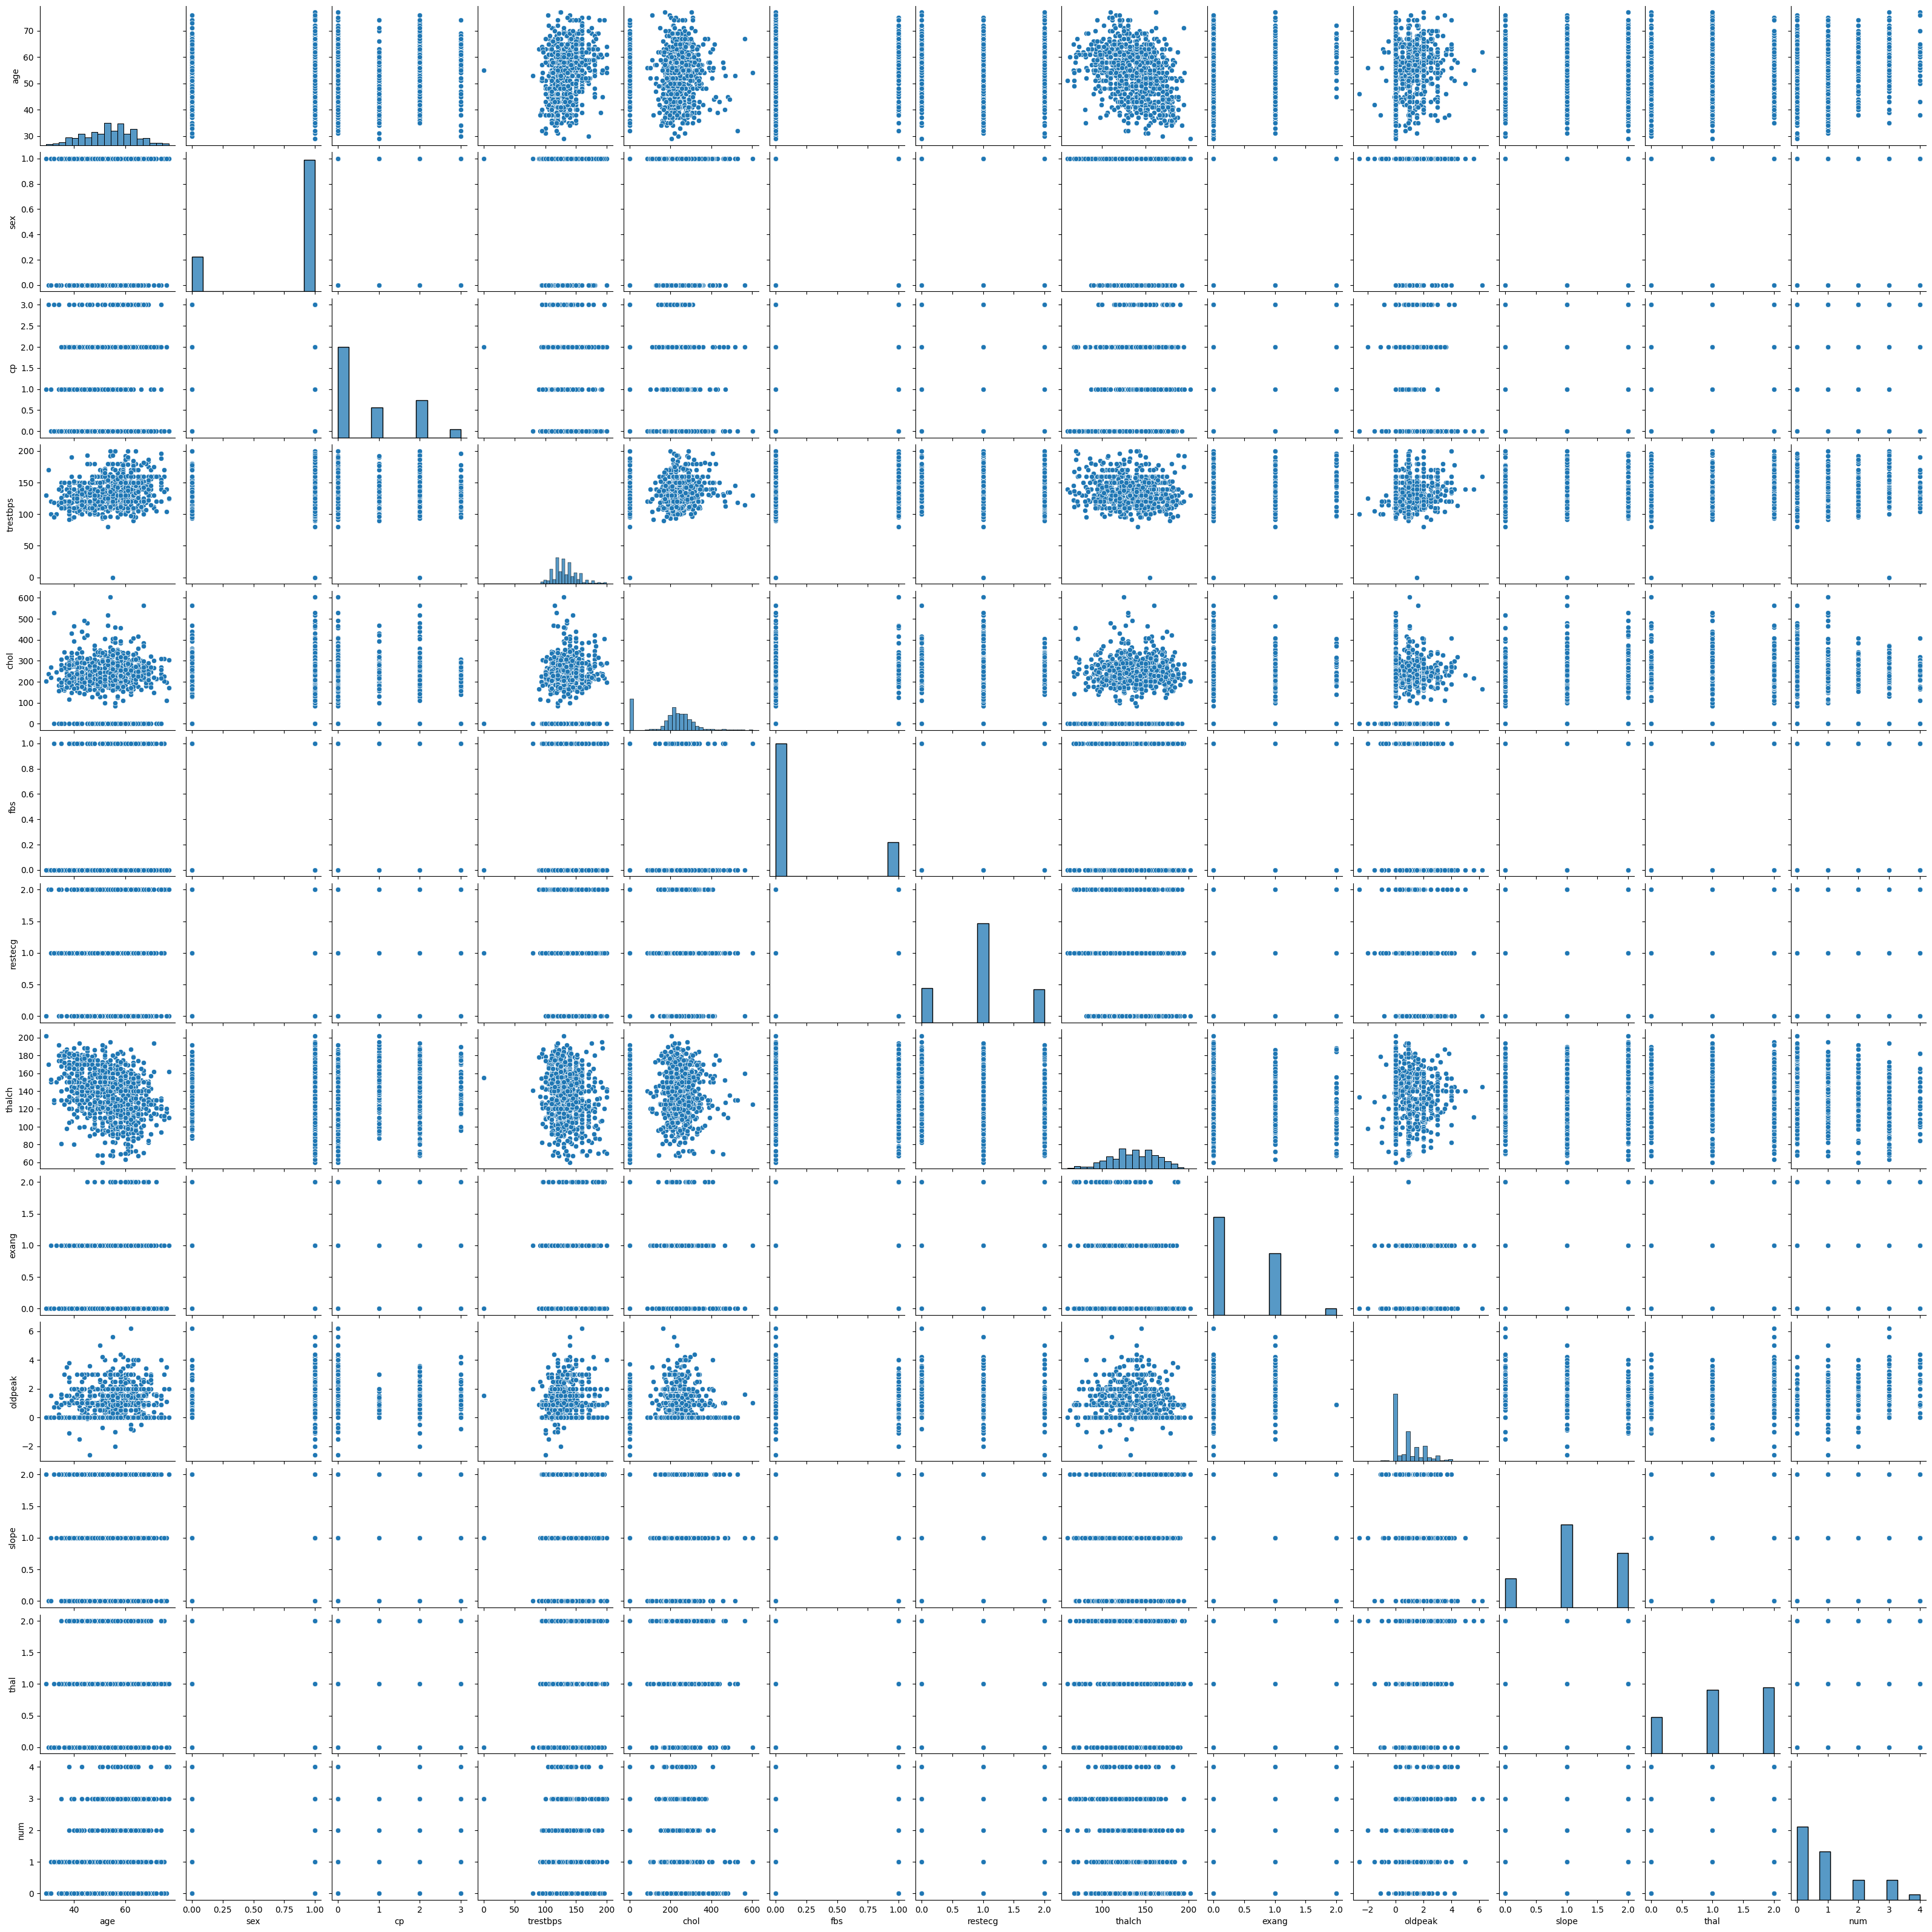

In [12]:
import seaborn as sns                              # visualization using pairplot
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

<Axes: >

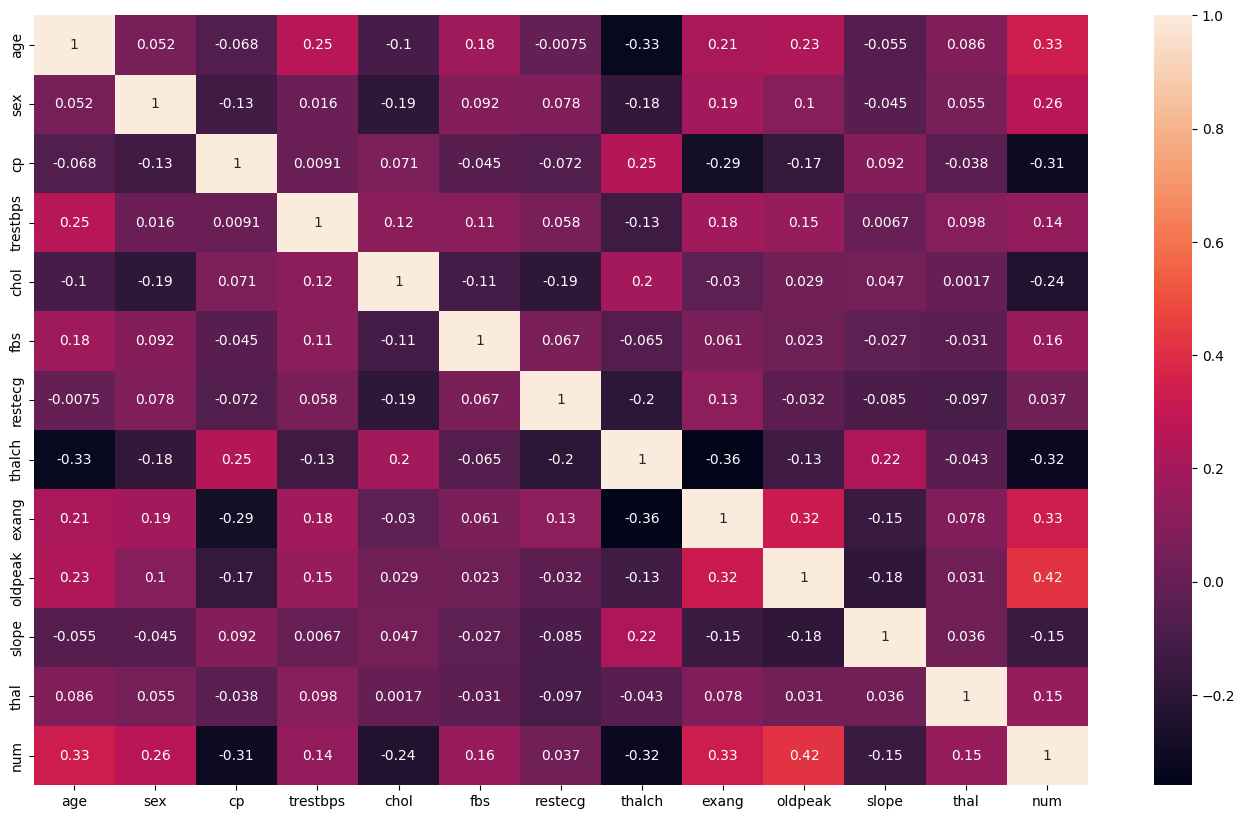

In [13]:
plt.figure(figsize=(17,10))                              # visualization using heatmap
sns.heatmap(df.corr(), annot=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

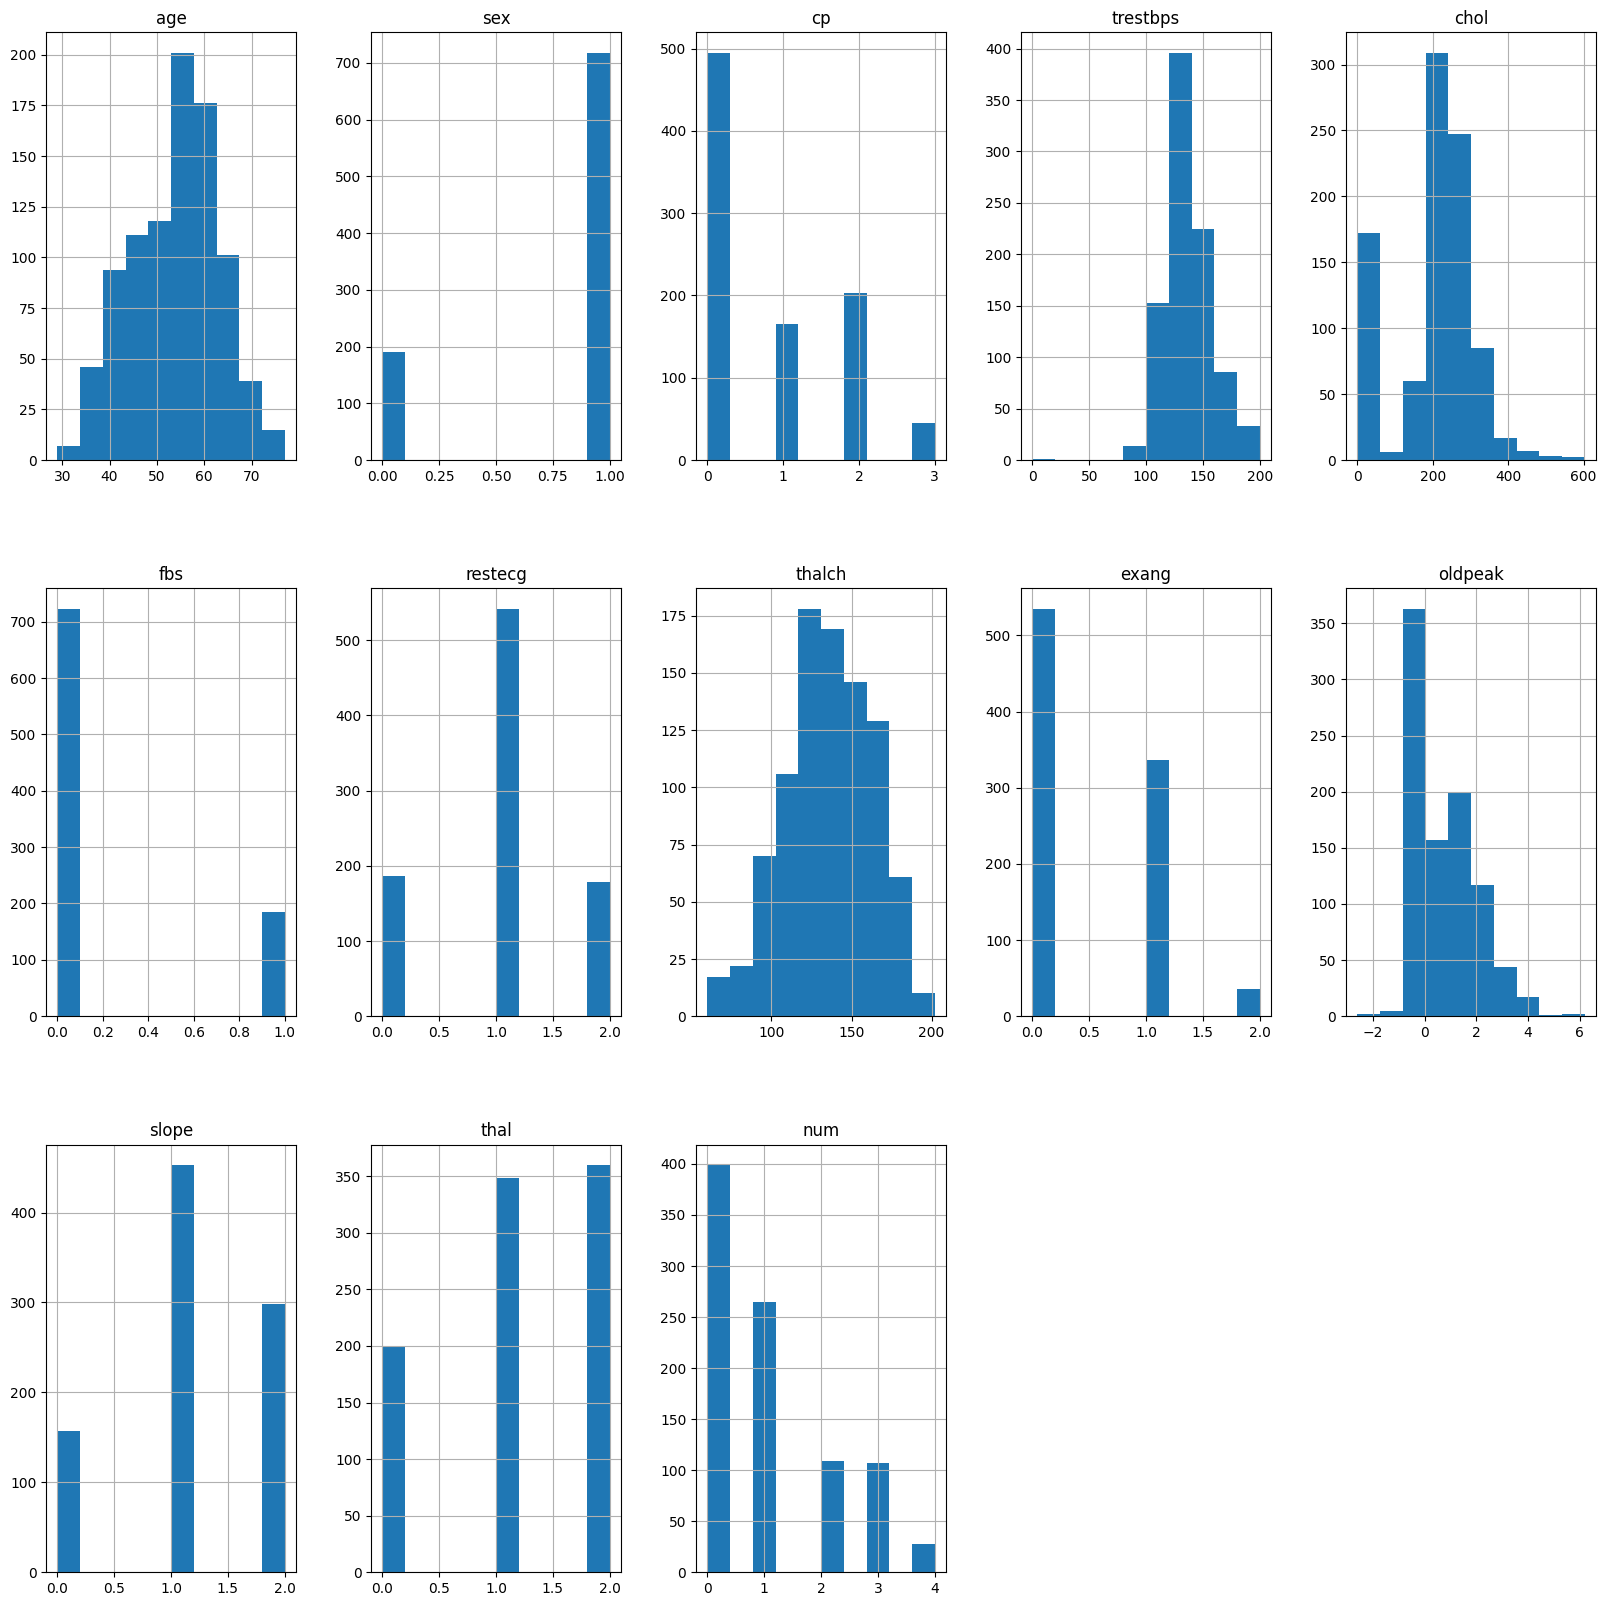

In [14]:
df.hist(figsize=(20,20),layout=(3,5))      # histogram plot

In [15]:
from sklearn.model_selection import train_test_split         # feature extraction (EDA process 2)
x=df.drop('num',axis=1)
y=df['num']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)       # splitting train test dato to 80%-20% ratio

In [17]:
from sklearn import tree                                       #importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)                                    # fitting the model


DecisionTreeClassifier()

In [19]:
y_pred=dtree.predict(x_train)                 # # fitting training model
y_pred

array([0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 3,
       1, 3, 0, 1, 1, 0, 3, 1, 0, 3, 3, 2, 3, 1, 1, 0, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 4, 0, 1, 3, 1,
       1, 1, 3, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 4, 4, 1, 0, 0, 2, 1, 0, 3, 3, 2, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 2, 3,
       1, 1, 1, 0, 2, 1, 3, 0, 0, 1, 3, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0,
       4, 3, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 3, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 4, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 3, 4, 1, 0, 1, 2, 1, 0, 0, 0, 1, 3, 1, 0, 0, 3,
       1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 4, 0, 0, 2, 0,
       0, 0, 4, 1, 3, 0, 1, 0, 0, 3, 0, 1, 0, 1, 2,

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(confusion_matrix(y_train,y_pred))

[[310   0   0   0   0]
 [  0 217   0   0   0]
 [  0   0  87   0   0]
 [  0   0   0  90   0]
 [  0   0   0   0  22]]


In [22]:
print(classification_report(y_train,y_pred))              # training model accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       217
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726



In [23]:
y_pred_test=dtree.predict(x_test)       # predicting testing model
y_pred_test

array([1, 1, 0, 4, 1, 1, 1, 0, 1, 1, 3, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 4, 0, 3, 0,
       2, 2, 1, 0, 0, 1, 2, 3, 0, 3, 0, 0, 3, 1, 4, 2, 0, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       3, 2, 3, 2, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 1, 1, 0, 2, 3, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 4, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 4,
       2, 1, 4, 2, 0, 0])

In [24]:
print(confusion_matrix(y_test,y_pred_test))

[[65 14  4  5  1]
 [17 16  9  5  1]
 [ 3  4  9  4  2]
 [ 3 10  0  1  3]
 [ 0  4  2  0  0]]


In [25]:
print(classification_report(y_test,y_pred_test))            # predicting accuracy for the test model

              precision    recall  f1-score   support

           0       0.74      0.73      0.73        89
           1       0.33      0.33      0.33        48
           2       0.38      0.41      0.39        22
           3       0.07      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.30      0.31      0.30       182
weighted avg       0.50      0.50      0.50       182



In [ ]:
# the accuracy of the model in predicting the hear disease prone people is 50% which is very low. Decision tree algorithm is not recommended for model development.

In [31]:
from yellowbrick.classifier import ROCAUC

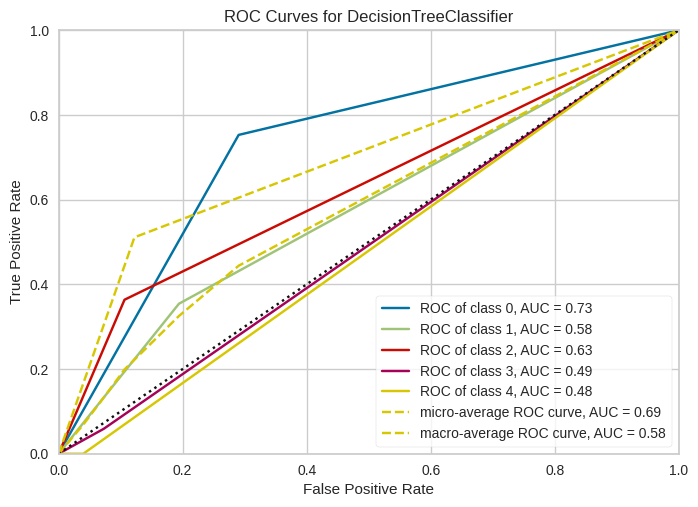

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [32]:
model = DecisionTreeClassifier()
visualizer = ROCAUC(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()